# Goals and Objectives
The goal of this data science project is to predict survivors of passengers based on the given features and compare machine learning models.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

First of all, let's check our data!

In [2]:
train = pd.read_csv('../input/titanic/train.csv',index_col ='PassengerId')
test = pd.read_csv('../input/titanic/test.csv',index_col ='PassengerId')

Create function that sort columns with missing value from the most to the least.

In [3]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

In [ ]:
# check our data test
test

In [ ]:
# check our data train
train

# Exploratory Data Analysis

Let's separate numerical and categorical column to make visualization easier.

In [4]:
# look at numeric and categorical values separately 
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

let's check how our data is distributed

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


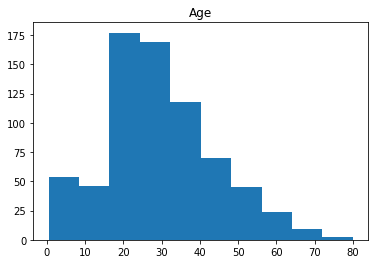

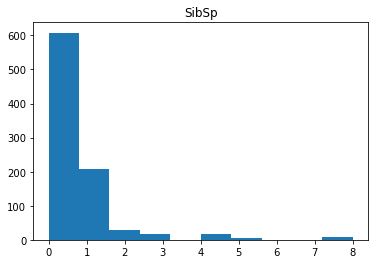

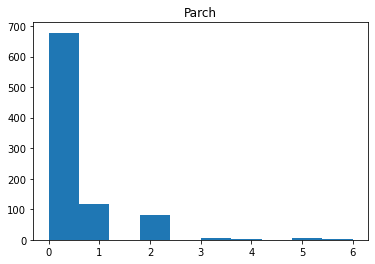

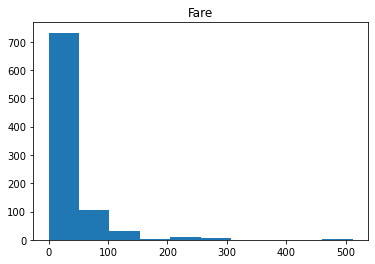

In [5]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Based on the distribution chart above looks like Age, SibSp, Parch and Fare columns are skewed to the right. Let's continue and see how the features are correlated to each other!

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


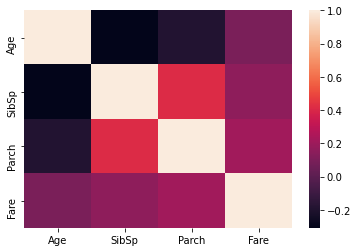

In [6]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [7]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


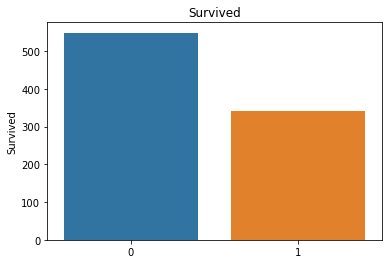

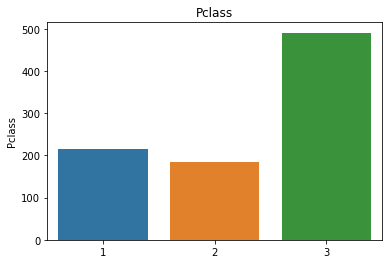

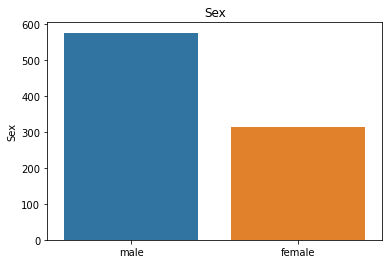

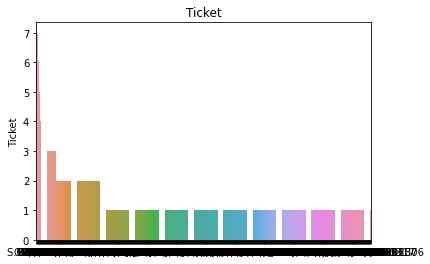

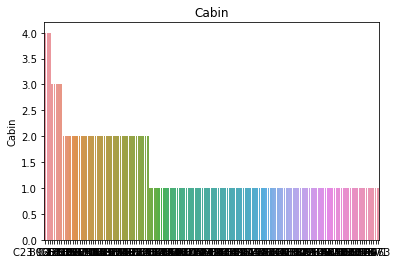

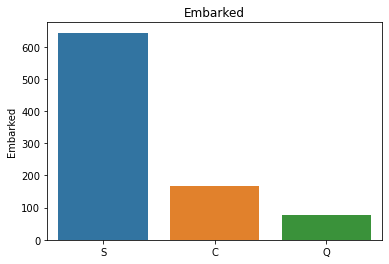

In [8]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [9]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Data Cleaning

Merge data train and data test to make data cleaning process easier!

In [10]:
# Combine data test and data train
len_train= train.shape[0]
data_train_test= pd.concat([train, test], sort=False)

In [11]:
# Check our data
data_train_test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [12]:
# Check our missing value in our data
missing(data_train_test)

Cabin       77.46
Survived    31.93
Age         20.09
Embarked     0.15
Fare         0.08
Ticket       0.00
Parch        0.00
SibSp        0.00
Sex          0.00
Name         0.00
Pclass       0.00
dtype: float64


'Cabin' column have over 70% missing value, i think we have to remove it. In this case we will handle the 'survived' column later. On the other hand 'name' columns does not have missing value but name of passenger is irrelevant to our machine learning model.

In [13]:
# remove columns with missing value above 30% and irrelevant feature
data_train_test.drop(['Cabin','Name'],axis=1,inplace=True)

In [14]:
#check missing value again
missing(data_train_test)

Survived    31.93
Age         20.09
Embarked     0.15
Fare         0.08
Ticket       0.00
Parch        0.00
SibSp        0.00
Sex          0.00
Pclass       0.00
dtype: float64


Let's visualize our missing value!

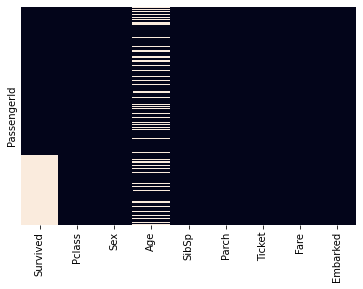

In [15]:
sns.heatmap(data_train_test.isnull(),yticklabels=False,cbar=False)

Let's separate numerical and categorical column to make data cleaning process easier.

In [16]:
# Select categorical columns
categorical_cols = [cname for cname in data_train_test.columns if
                    data_train_test[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in data_train_test.columns if 
                data_train_test[cname].dtype in ['int64', 'float64']]

In [17]:
# check the categorical columns
categorical_cols

['Sex', 'Ticket', 'Embarked']

In [18]:
# check the numerical columns
numerical_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In this problem, numeric missing value columns will fill up with average value and categorical columns will fill up with 0.

In [19]:
# Fill up the missing value!
for i in numerical_cols:
    data_train_test[i]=data_train_test[i].fillna(data_train_test[i].mean())
for i in categorical_cols:
    data_train_test[i]=data_train_test[i].fillna(data_train_test[i].mode()[0])

check if there are still missing value on our data

In [20]:
# check missing value
missing(data_train_test)

Embarked    0.0
Fare        0.0
Ticket      0.0
Parch       0.0
SibSp       0.0
Age         0.0
Sex         0.0
Pclass      0.0
Survived    0.0
dtype: float64


In [21]:
# check data
data_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


In [22]:
object_cols = categorical_cols

Before we handle categorical data with one-hot-encoder we have to check amount of unique entries by column

In [23]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: data_train_test[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Sex', 2), ('Embarked', 3), ('Ticket', 929)]

In [24]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if data_train_test[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['Sex', 'Embarked']

Categorical columns that will be dropped from the dataset: ['Ticket']


drop the 'ticket' column

In [25]:
data_train_test.drop(['Ticket'],axis=1,inplace=True)

Apply `OneHotEncoder` on our categorical columns

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data_train_test[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = data_train_test.index


# Remove categorical columns (will replace with one-hot encoding)
num_X = data_train_test.drop(low_cardinality_cols, axis=1)

# Add one-hot encoded columns to numerical features
data_train_test = pd.concat([num_X, OH_cols], axis=1)

In [27]:
# let's check our current data before continue
data_train_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
PassengerId,,,,,,,,,,,
1,0.0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
2,1.0,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
3,1.0,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
4,1.0,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
5,0.0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


Our data cleaning process is done. Next step is split the data again into 'X_train_full', X_test_full' and 'y_train'.

In [28]:
#split the data again
X_train_full= data_train_test[:len_train]
X_test_full= data_train_test[len_train:]
y_train = X_train_full['Survived']
X_train_full.drop(['Survived'],axis=1,inplace=True)
X_test_full.drop(['Survived'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
# check data train
X_train_full.head()

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
2,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
3,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
4,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
5,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [30]:
# check data test
X_test_full.head()

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
PassengerId,,,,,,,,,,
892,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
893,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
894,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
895,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
896,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


In [31]:
# check data train target prediction
y_train.head()

PassengerId
1    0.0
2    1.0
3    1.0
4    1.0
5    0.0
Name: Survived, dtype: float64

# Build Model

In this project we will compare several classifier model machine learning. Furthermore, we will use `cross_val_score` to compare the model performance

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras import layers

let's start with `GaussianNB`!

In [33]:
model_gnb = GaussianNB()
scores_gnb =  cross_val_score(model_gnb, X_train_full, y_train,
                              cv=5)

print("Average score model_gnb:", scores_gnb.mean())

Average MAE score model_gnb: 0.7890276818780995


In [34]:
model_lr = LogisticRegression(max_iter = 2000)
scores_lr =  cross_val_score(model_lr, X_train_full, y_train,
                              cv=5)

print("Average score model_lr:", scores_lr.mean())

Average MAE score model_lr: 0.7867679367271359


keep going!

In [35]:
model_dt = tree.DecisionTreeClassifier(random_state = 1)
scores_dt =  cross_val_score(model_dt, X_train_full, y_train,
                              cv=5)

print("Average score model_dt:", scores_dt.mean())

Average MAE score model_dt: 0.7721863034335572


In [36]:
model_knn = KNeighborsClassifier()
scores_knn =  cross_val_score(model_knn, X_train_full, y_train,
                              cv=5)

print("Average score model_knn:", scores_knn.mean())

Average MAE score model_knn: 0.7015002196974451


In [37]:
model_rf = RandomForestClassifier(random_state = 1)
scores_rf =  cross_val_score(model_rf, X_train_full, y_train,
                              cv=5)

print("Average score model_rf:", scores_rf.mean())

Average MAE score model_rf: 0.8126106333563493


In [38]:
model_svc = SVC(probability = True)
scores_svc =  cross_val_score(model_svc, X_train_full, y_train,
                              cv=5)

print("Average score model_svc:", scores_svc.mean())

Average MAE score model_svc: 0.674615529470843


In [39]:
model_xgb = XGBClassifier(random_state =1)
scores_xgb =  cross_val_score(model_xgb, X_train_full, y_train,
                              cv=5)

print("Average score model_xgb:", scores_xgb.mean())

Average MAE score model_xgb: 0.8103508882053856


and lastly, TensorFlow.

In [41]:
model_tf = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=[10]),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [42]:
model_tf.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_split, y_val = train_test_split(X_train_full, y_train, 
                                                                train_size=0.8,
                                                                random_state=0)

In [45]:
history = model_tf.fit(
    X_train, y_train_split,
    validation_data=(X_val, y_val),
    batch_size=50,
    epochs=50,
)

Epoch 1/50
15/15 [==============================] - 0s 15ms/step - loss: 1.4400 - binary_accuracy: 0.3834 - val_loss: 0.8084 - val_binary_accuracy: 0.3799
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8337 - binary_accuracy: 0.4326 - val_loss: 0.6658 - val_binary_accuracy: 0.7430
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6818 - binary_accuracy: 0.6545 - val_loss: 0.5971 - val_binary_accuracy: 0.6983
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6418 - binary_accuracy: 0.6699 - val_loss: 0.5870 - val_binary_accuracy: 0.6872
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6296 - binary_accuracy: 0.6671 - val_loss: 0.5824 - val_binary_accuracy: 0.6872
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6268 - binary_accuracy: 0.6615 - val_loss: 0.5766 - val_binary_accuracy: 0.6927
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6

Best Validation Loss: 0.4459
Best Validation Accuracy: 0.7933


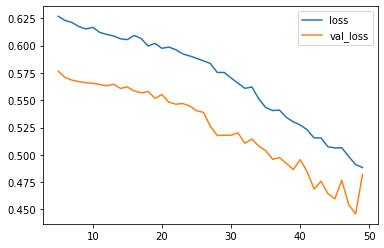

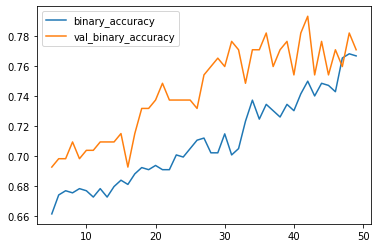

In [46]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [47]:
print("Average score model_tf:",history_df['val_binary_accuracy'].max())

Average MAE score model_tf: 0.7932960987091064


In [48]:
print("Average score model_gnb:", scores_gnb.mean())
print("Average score model_lr:", scores_lr.mean())
print("Average score model_dt:", scores_dt.mean())
print("Average score model_knn:", scores_knn.mean())
print("Average score model_rf:", scores_rf.mean())
print("Average score model_svc:", scores_svc.mean())
print("Average score model_xgb:", scores_xgb.mean())
print("Average score model_tf:",history_df['val_binary_accuracy'].max())

Average MAE score model_gnb: 0.7890276818780995
Average MAE score model_lr: 0.7867679367271359
Average MAE score model_dt: 0.7721863034335572
Average MAE score model_knn: 0.7015002196974451
Average MAE score model_rf: 0.8126106333563493
Average MAE score model_svc: 0.674615529470843
Average MAE score model_xgb: 0.8103508882053856
Average MAE score model_tf: 0.7932960987091064


based on `cross-val-score` we can conclude that model using `RandomForestClassifier` is given best performance with accuracy 0.81. Next, let's submit our prediction!

In [ ]:
model_rf.fit(X_train_full, y_train)
preds_test = model_rf.predict(X_test_full)

In [ ]:
output = pd.DataFrame({'PassengerId': X_test_full.index,
                       'Survived': preds_test})
output.to_csv('submission.csv', index=False)